In [ ]:
#Assignment 1

In [ ]:
#Uploading files

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv to Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv


In [ ]:
#Importing required libraries

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [ ]:
#Loading dataset and performing data preprocessing

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

df.columns = df.columns.str.strip()

print(df.head())
print(df.info())
print(df.isnull().sum())

df['Label_binary'] = (df['Label'] != 'BENIGN').astype(int)

features = df.drop(['Label', 'Label_binary'], axis=1)

# Replacing infinite values with NaN
features = features.replace([np.inf, -np.inf], np.nan)

features = features.dropna()
df = df.loc[features.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             54865              3                  2                       0   
1             55054            109                  1                       1   
2             55055             52                  1                       1   
3             46236             34                  1                       1   
4             54863              3                  2                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                           12                            0   
1                            6                            6   
2                            6                            6   
3                            6                            6   
4                           12                            0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      6                      6            

In [ ]:
#Training Isolation Forest on scaled data and marking anomaliies.

In [5]:
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_scaled)
preds = model.predict(X_scaled)

df['anomaly'] = (preds == -1).astype(int)  # 1 = anomaly, 0 = normal


In [ ]:
#Visualizing data

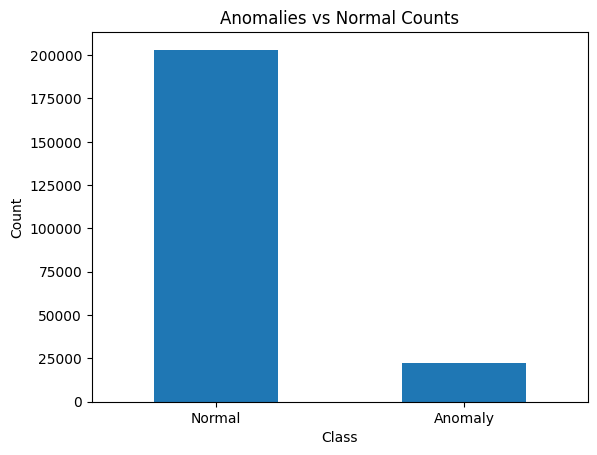

In [6]:
df['anomaly'].value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Normal', 'Anomaly'], rotation=0)
plt.title('Anomalies vs Normal Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
#Assignment 2

In [ ]:
#Importing required libraries

In [8]:
from sklearn.metrics import confusion_matrix

In [ ]:
#Loading dataset and performing data preprocessing

In [7]:
df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df.columns = df.columns.str.strip()

print(df.head())
print(df.info())

df['Label_binary'] = (df['Label'] != 'BENIGN').astype(int)  # 1 = attack, 0 = normal

features = df.drop(['Label', 'Label_binary'], axis=1)

# Replacing infinite values with NaN
features = features.replace([np.inf, -np.inf], np.nan)

# Dropping rows with NaN values in features
features = features.dropna()
df = df.loc[features.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             54865              3                  2                       0   
1             55054            109                  1                       1   
2             55055             52                  1                       1   
3             46236             34                  1                       1   
4             54863              3                  2                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                           12                            0   
1                            6                            6   
2                            6                            6   
3                            6                            6   
4                           12                            0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      6                      6            

In [ ]:
#Train Isolation Forest on the scaled features and creating a binary anomaly label

In [9]:
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_scaled)

preds = model.predict(X_scaled)
df['anomaly'] = (preds == -1).astype(int)  # 1 = anomaly, 0 = normal

In [ ]:
#Final confusion matrix and report

In [13]:
cm = confusion_matrix(df['Label_binary'], df['anomaly'])
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(df['Label_binary'], df['anomaly']))

print("The confusion matrix reveals some false negatives, indicating the model can be improved to detect more attacks, along with a manageable number of false positives. Despite a moderate accuracy (~0.38), this shows promise that with parameter tuning and enhanced features, the Isolation Forest can better identify anomalies in the dataset.")


Confusion Matrix:
 [[ 80135  17551]
 [123005   5020]]

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.82      0.53     97686
           1       0.22      0.04      0.07    128025

    accuracy                           0.38    225711
   macro avg       0.31      0.43      0.30    225711
weighted avg       0.30      0.38      0.27    225711

The confusion matrix reveals some false negatives, indicating the model can be improved to detect more attacks, along with a manageable number of false positives.  Despite a moderate accuracy (~0.38), this shows promise that with parameter tuning and enhanced features, the Isolation Forest can better identify anomalies in the dataset.


In [ ]:
#Assignment 3

In [ ]:
# Importing necessary libraries for visualization

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading dataset and performing data preprocessing

In [16]:
df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df.columns = df.columns.str.strip()

print(df.head())
print(df.info())
df['Label_binary'] = (df['Label'] != 'BENIGN').astype(int)
features = df.drop(['Label', 'Label_binary'], axis=1)

# Replacing infinite values with NaN
features = features.replace([np.inf, -np.inf], np.nan)

features = features.dropna()
df = df.loc[features.index]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             54865              3                  2                       0   
1             55054            109                  1                       1   
2             55055             52                  1                       1   
3             46236             34                  1                       1   
4             54863              3                  2                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                           12                            0   
1                            6                            6   
2                            6                            6   
3                            6                            6   
4                           12                            0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      6                      6            

In [ ]:
# Training the model, visualizing the anomalies and plotting heatmap of correlation matrix

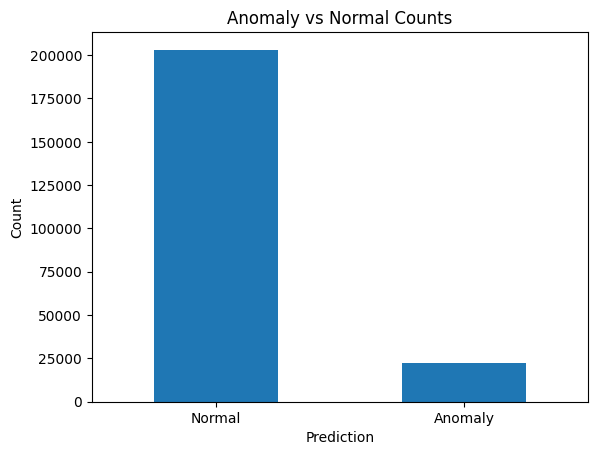

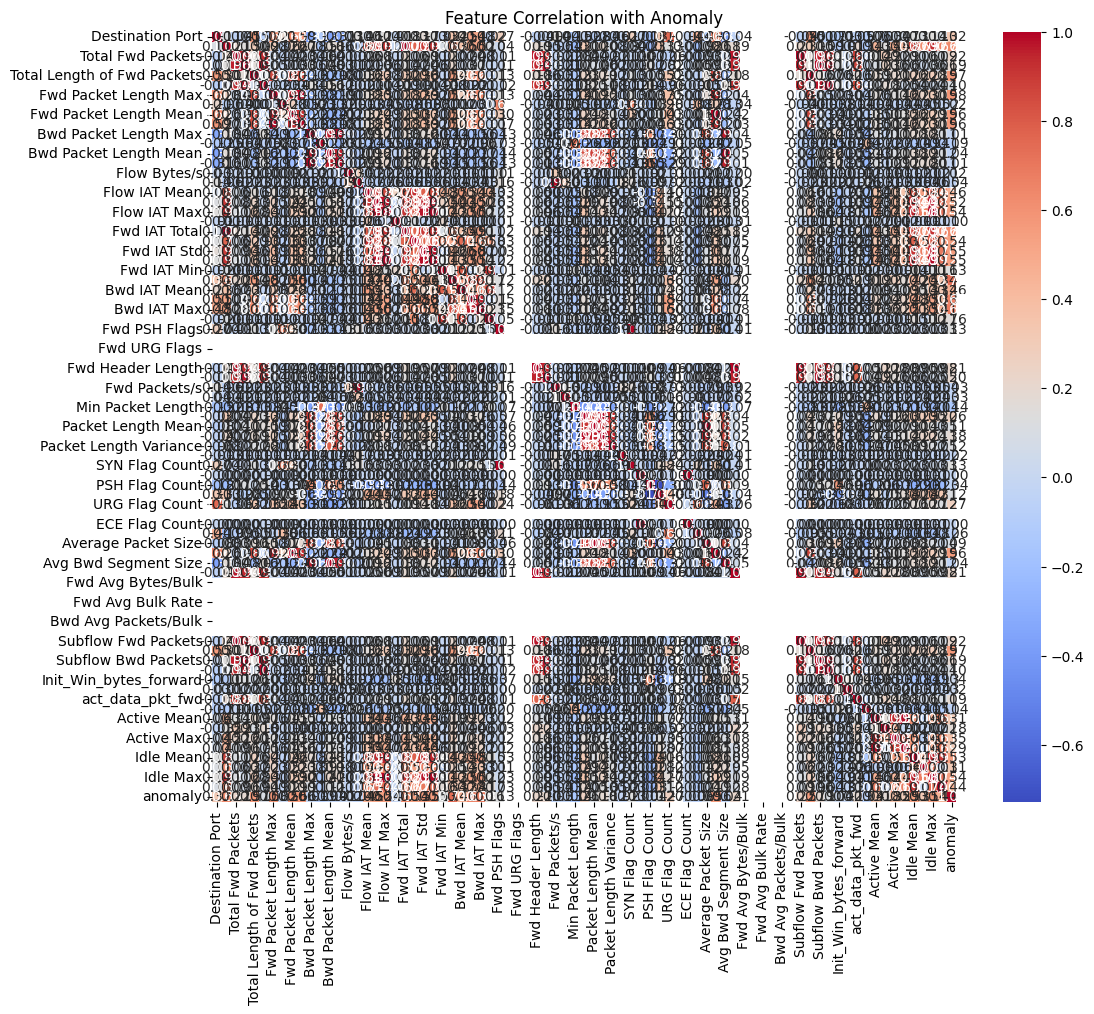

Confusion Matrix:
 [[ 80135  17551]
 [123005   5020]]

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.82      0.53     97686
           1       0.22      0.04      0.07    128025

    accuracy                           0.38    225711
   macro avg       0.31      0.43      0.30    225711
weighted avg       0.30      0.38      0.27    225711



In [17]:
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_scaled)

preds = model.predict(X_scaled)
df['anomaly'] = (preds == -1).astype(int)  # 1 for anomaly, 0 for normal

df['anomaly'].value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Normal', 'Anomaly'], rotation=0)
plt.title('Anomaly vs Normal Counts')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.show()

features_list = df.columns.drop(['Label', 'Label_binary', 'anomaly']).tolist()
corr_matrix = df[features_list + ['anomaly']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation with Anomaly")
plt.show()
cm = confusion_matrix(df['Label_binary'], df['anomaly'])
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(df['Label_binary'], df['anomaly']))
